In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 

from sklearn.linear_model import LogisticRegression

In [151]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=25)

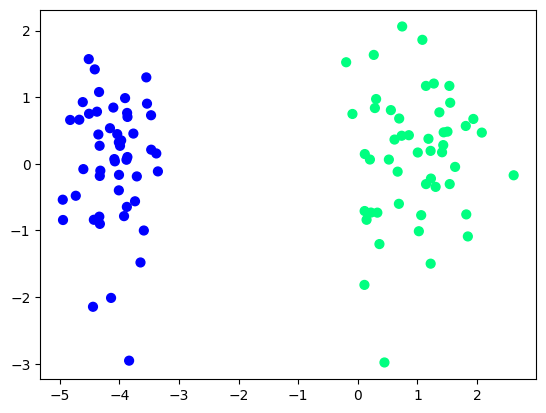

In [152]:
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap='winter')

In [153]:
def step_perceptron(z):
    return 1 if z>0 else 0

In [154]:
def step_sigmoid(z):
    return 1/(1 + np.exp(-z))

In [155]:
def sigmoid(x, y):
    x = np.insert(x, 0, 1, axis=1)
    weight = np.ones(x.shape[1])
    learning_rate = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step_sigmoid(np.dot(x[j], weight))
        weight = weight + learning_rate*(y[j]-y_hat)*x[j]
    
    return weight[0], weight[1:]

In [156]:
intercept_sigmoid, coef_sigmoid = sigmoid(x, y)

m = -(coef_sigmoid[0]/coef_sigmoid[1])
b = -(intercept_sigmoid/coef_sigmoid[1])

x_input_sigmoid = np.linspace(-3, 3, 100)
y_input_sigmoid = m*x_input_sigmoid+b

In [157]:
def perception(x, y):
    x = np.insert(x, 0, 1, axis=1)
    weigh = np.ones(x.shape[1])
    learning_rate = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step_perceptron(np.dot(x[j], weigh))
        weigh = weigh + learning_rate*(y[j]-y_hat)*x[j]

    return weigh[0], weigh[1:]

In [158]:
intercept_perceptron, coef_perceptron = sigmoid(x, y)

m = -(coef_perceptron[0]/coef_perceptron[1])
b = -(intercept_perceptron/coef_perceptron[1])

x_input_perceptron = np.linspace(-3, 3, 100)
y_input_perceptron = m*x_input_perceptron+b

(-3.0, 2.0)

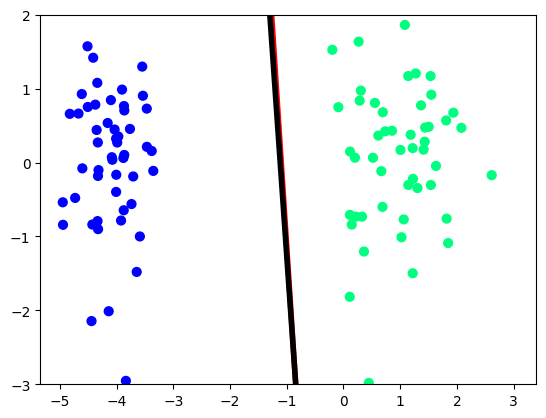

In [159]:
plt.plot(x_input_perceptron, y_input_perceptron, color='red', linewidth=4)
plt.plot(x_input_sigmoid, y_input_sigmoid, color='black', linewidth=4)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap='winter')
plt.ylim(-3,2)

In [160]:
logistic_regression = LogisticRegression()

In [161]:
logistic_regression.fit(x, y)

intercept_model = logistic_regression.intercept_
coef_model = logistic_regression.coef_

m = -(coef_model[0][0]/coef_model[0][1])
b = -(intercept_model/coef_model[0][1])

In [162]:
x_input_model = np.linspace(-3, 3)
y_input_model = m*x_input_model + b 

(-3.0, 2.0)

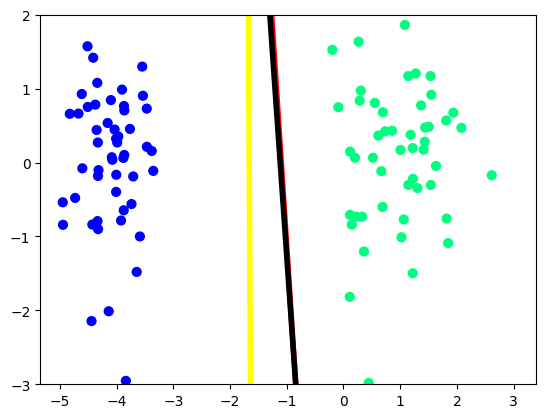

In [163]:
plt.plot(x_input_perceptron, y_input_perceptron, color='red', linewidth=4)
plt.plot(x_input_sigmoid, y_input_sigmoid, color='black', linewidth=4)
plt.plot(x_input_model, y_input_model, color='yellow', linewidth=4)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap='winter')
plt.ylim(-3,2)